# Histogram equalization

A histogram is a graphical representation the number of pixels in a single band corresponding to each possible pixel value. The brightness values (i.e. 0-255 for an 8-bit image) are displayed along the x-axis of the graph. The frequency of occurrence of each of these values in the image is shown on the y-axis.

A histogram is a representation of frequency distribution. It is the basis for numerous spatial domain processing techniques. Histogram manipulation can be used for image enhancement. 

Contrast is defined as the difference in intensity between two objects in an image. If the contrast is too low, it is impossible to distinguish between two objects, and they are seen as a single object. 

Histogram equalization is a widely used contrast-enhancement technique in image processing because of its high eﬃciency and simplicity. It is one of the sophisticated methods for modifying the dynamic range and contrast of an image by altering that image such that its intensity histogram has the desired shape. It can be classified into two branches as per the transformation function is used.

# Local Histogram Equalization (LHE)


LHE can enhance the overall contrast more effectively.

One of the drawbacks of histogram equalization is that it can change the mean brightness of an image significantly as a consequence of histogram flattening and sometimes this is not a desirable property when preserving the original mean brightness of a given image is necessary. Bi-Histogram Equalization was proposed to overcome this problem.

# Global Histogram Equalization 

GHE is very simple and fast, but its contrast enhancement power is low. Here the histogram of the whole input image is used to compute the histogram transformation function. As a result, the dynamic range of the image histogram is ﬂattened and stretched. The overall contrast is improved.

In [2]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import matplotlib.image as image

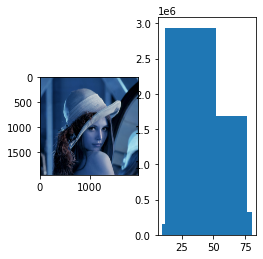

In [3]:
img = cv.imread('task2.jpg')
#bgr to rgb
plt.subplot(131)
plt.imshow(img)
plt.subplot(132)

#plt.hist(img.ravel(),256,[0,256])
#plt.subplot(133)
plt.hist(img.ravel(),[10,12,52,76,80],[0,256])
plt.show()

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195.
 196. 

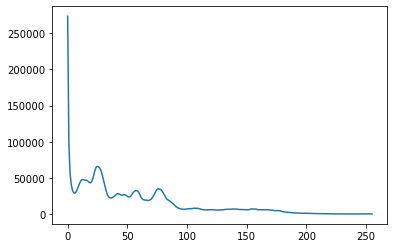

In [4]:
red = img[:,:,0]

red , bins= np.histogram(img[:,:,0],256,[0,256])
print(bins)
plt.plot(bins[0:-1], red)
#plt.hist(red.ravel())

(1960, 1960, 3)


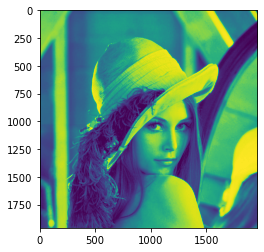

In [5]:
gray = cv.imread('task2.jpg')

print(gray.shape)
#eqlgray = cv.equalizeHist(gray)
#eqlred = cv.equalizeHist(img[:,:,0])
#eqlgreen = cv.equalizeHist(img[:,:,1])
eqlblue = cv.equalizeHist(img[:,:,2])
plt.imshow(eqlblue)

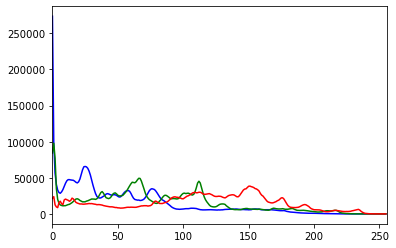

In [6]:
color = ('b','g','r')

for i,col in enumerate(color):
    histr = cv.calcHist([img],[i],None,[256],[0,256])
   
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

In [7]:
image = cv.imread('task2.jpg')
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
edge_det = cv.Canny(gray ,100, 100)

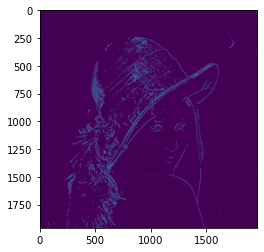

In [8]:
plt.imshow(edge_det)

# Histogram Matching
While the goal of histogram equalization is to produce an output image that has a flattened histogram, the goal of histogram matching is to take an input image and generate an output image that is based upon the shape of a specific (or reference) histogram. Histogram matching is also known as histogram specification. You can consider histogram equalization as a special case of histogram matching in which we want to force an image to have a uniform histogram (rather than just any shape as is the case for histogram matching).

Let us suppose we have two images, an input image and a specified image. We want to use histogram matching to force the input image to have a histogram that is the shape of the histogram of the specified image. The first few steps are similar to histogram equalization, except we are performing histogram equalization on two images (original image and the specific image).

# Statistics
In order to perform many of the image enhancement techniques, statistics for rasters must be calculated. These statistics can include the following:

Pixel count and percentage per class for classification images.

Basic statistics (minimum, maximum, mean, and standard deviation of values) for single- or multi-band images.

Histograms with frequency distributions (number of points, cumulative points, percent for each bin, and cumulative percentage for each DN (digital number)